Dataset

This data set contains booking information for a city hotel and a resort hotel and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. Will perform exploratory data analysis with python to get insight from the data.


 We will perform exploratory data analysis with python to get insight from the data.


 Data Description:


-hotel (str) - Hotel (H1 = Resort Hotel or H2 = City Hotel)

-lead_time (int) - Number of days that elapsed between the entering date of the booking into the PMS and the arrival date

-arrival_date_year (int) - Year of arrival date

-arrival_date_month (str) - Month of arrival date

-arrival_date_week_number (int) - Week number of year for arrival date

-arrival_date_day_of_month (int) - Day of arrival date

-stays_in_weekend_nights (int) - Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

-stays_in_week_nights (int) - Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

-adults (int) - Number of adults

-children (float) - Number of children

-babies (int) - Number of babies

-meal (str) - Type of meal booked. Categories are presented in standard hospitality meal

-packages: (Undefined/SC = no meal package, BB = Bed & Breakfast, HB = Half board – breakfast and one other meal
 usually dinner, FB = Full board – breakfast, lunch and dinner)

-country (str) - Country of origin. Categories are represented in the ISO 3155–3:2013 format

-market_segment (str) - Market segment designation (TA = Travel Agents, TO = Tour Operators)

-distribution_channel (str) - Booking distribution channel (TA = Travel Agents, TO = Tour Operators)

-is_repeated_guest (int) - Value indicating if the booking name was from a repeated guest (1) or not (0)

-previous_cancellations (int) - Number of previous bookings that were cancelled by the customer prior to the current


In [ ]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importing neccesary libraries.

import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
pd.set_option('display.max_columns', 500)

**INSPECTION OF DATA.**

In [99]:
url="https://github.com/chetanpw98/Chetan_Warad_002817179_Data-science-Assignment/blob/main/Chetan_Warad_002817179_hotel_bookings.csv"

hotel= pd.read_csv('/content/Chetan_hotel_bookings.csv')
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [100]:
hotel.shape

(119390, 32)

In [ ]:
#checking datatypes
hotel.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

**OBSERVATIONS**

The dataset have 32 variables (Numerical and Categorical)

*   12 categorical columns (object data type).
*   20 numerical columns (16 with int64 data type and 4 with float64 data type).




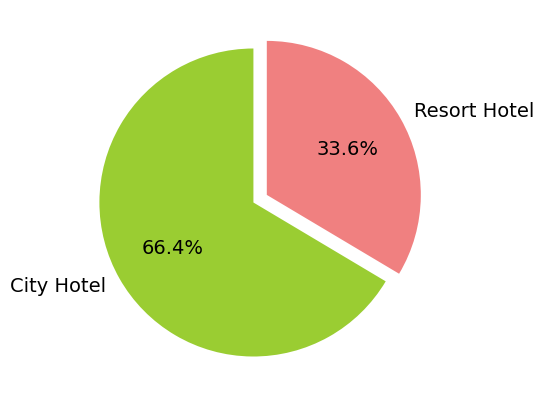

In [ ]:
# Enlarging the pie chart
plt.rcParams['figure.figsize'] = 5,5

# Indexing labels. tolist() will convert the index to list for easy manipulation
labels = hotel['hotel'].value_counts().index.tolist()

# Convert value counts to list
sizes = hotel['hotel'].value_counts().tolist()

# As the name suggest, explode will determine how much each section is separated from each other
explode = (0, 0.1)

# Determine colour of pie chart
colors = ['yellowgreen', 'lightcoral']

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',startangle=90, textprops={'fontsize': 14})
plt.show()


**OBSERVATIONS**

### We can see that the percent of City hotel is more compared to Resort hotel.
### Resort Hotel tend to be on the expensive side and most people will just stick with city hotel.

**2. Cleaning the Data**

In [ ]:
#Checking the missing values in the columns

hotel.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
#Column-wise null percentage

print(round(100*(hotel.isnull().sum()/len(hotel.index)),2))

hotel                              0.00
is_canceled                        0.00
lead_time                          0.00
arrival_date_year                  0.00
arrival_date_month                 0.00
arrival_date_week_number           0.00
arrival_date_day_of_month          0.00
stays_in_weekend_nights            0.00
stays_in_week_nights               0.00
adults                             0.00
children                           0.00
babies                             0.00
meal                               0.00
country                            0.41
market_segment                     0.00
distribution_channel               0.00
is_repeated_guest                  0.00
previous_cancellations             0.00
previous_bookings_not_canceled     0.00
reserved_room_type                 0.00
assigned_room_type                 0.00
booking_changes                    0.00
deposit_type                       0.00
agent                             13.69
company                           94.31


**OBSERVATIONS**

The dataset contains **Missing values**. Hence will drop unnecassary columns.

* From the above table, company(94.31%) and agent(13.69%) have missing values.








In [ ]:
hotel=hotel.drop(['agent','company'],axis=1)

**Country has 488 rows with the NaN values. 488 rows out of 119390 is negligible hence we will just remove.**

In [ ]:
hotel = hotel.dropna(axis = 0)

In [ ]:
hotel.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

**No more missing values in the data**

**Lets Rename the columns for better readability**

In [ ]:
hotel.columns = ['Hotel', 'Cancelled', 'LeadTime', 'ArrivingYear', 'ArrivingMonth', 'ArrivingWeek','ArrivingDate', 'WeekendStay',
              'WeekStay', 'Adults', 'Children', 'Babies', 'Meal','Country', 'Segment', 'DistChannel','RepeatGuest', 'PrevCancel',
              'PrevBook', 'BookRoomType','AssignRoomType', 'ChangeBooking', 'DepositType', 'WaitingDays',
              'CustomerType', 'ADR','ParkSpace', 'SpecialRequest','Reservation', 'ReservationDate']



**Identify Continuous and Categorical Variables**

In [ ]:
def var(hotel):
    unique_list = pd.DataFrame([[i,len(hotel[i].unique())] for i in hotel.columns])
    unique_list.columns = ['name','uniques']

    total_var = set(hotel.columns)
    cat_var = set(unique_list.name[(unique_list.uniques<=12)      |
                                   (unique_list.name=='Country')  |
                                   (unique_list.name=='Agent')
                                  ])
    num_var = total_var - cat_var

    return cat_var, num_var


cat_var, num_var = var(hotel)

print("Numerical Variables (",len(num_var),")\n",num_var,'\n\n'
      "Categorical Variables(",len(cat_var),")\n",cat_var)

Numerical Variables ( 12 )
 {'ADR', 'WeekStay', 'PrevCancel', 'ReservationDate', 'LeadTime', 'PrevBook', 'ArrivingWeek', 'WeekendStay', 'WaitingDays', 'ArrivingDate', 'Adults', 'ChangeBooking'} 

Categorical Variables( 18 )
 {'ArrivingYear', 'ParkSpace', 'ArrivingMonth', 'Children', 'Segment', 'Hotel', 'Country', 'RepeatGuest', 'Cancelled', 'Babies', 'BookRoomType', 'AssignRoomType', 'Meal', 'SpecialRequest', 'DistChannel', 'Reservation', 'CustomerType', 'DepositType'}


Checking the Outliers

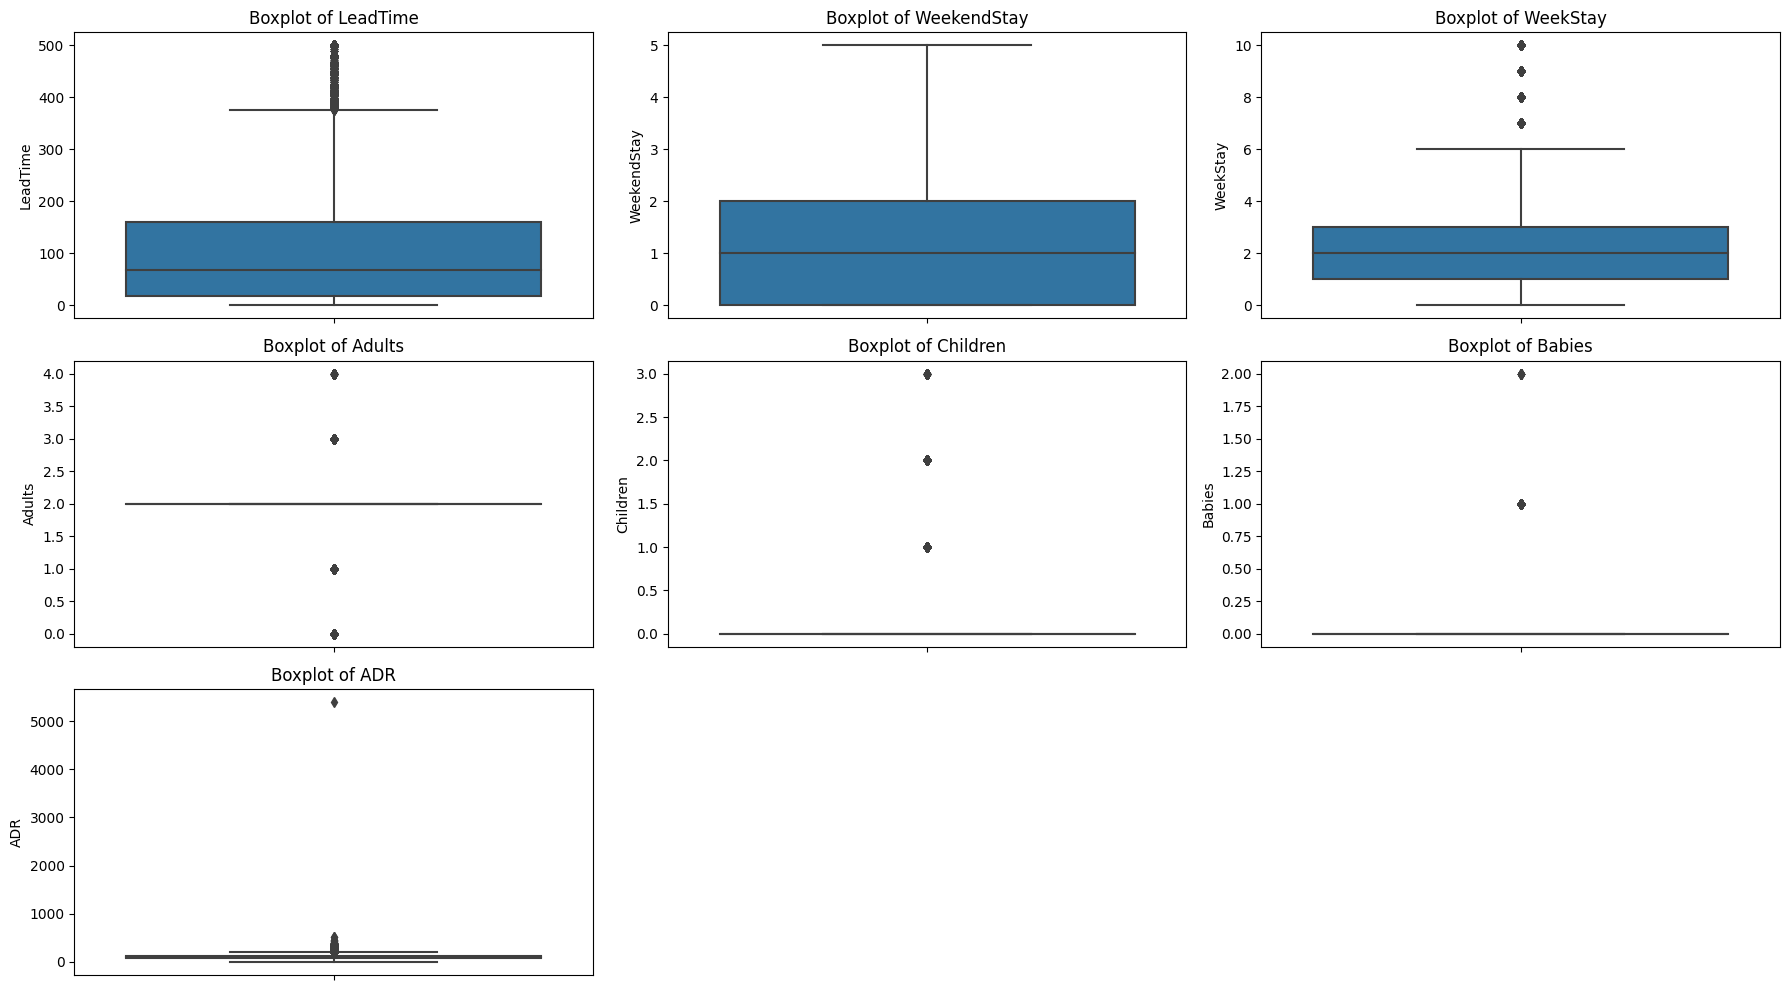

In [90]:
# Assuming 'hotel' is your DataFrame
features = ['LeadTime', 'WeekendStay', 'WeekStay', 'Adults', 'Children', 'Babies', 'ADR']

# Calculate the number of rows and columns needed to display the boxplots neatly
num_rows = len(features) // 3 + (len(features) % 3 > 0)
num_cols = 3

plt.figure(figsize=(18, 10))

for i, feature in enumerate(features, start=1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(y=hotel[feature], orient='v')  # Set orient to 'v' for vertical boxplots
    plt.title(f'Boxplot of {feature}')
    plt.tight_layout()

plt.show()

The dataset contains Outliers.

In [ ]:
#Checking outliers in numerical variables
hotel[num_var].describe()

,ADR,WeekStay,PrevCancel,LeadTime,PrevBook,ArrivingWeek,WeekendStay,WaitingDays,ArrivingDate,Adults,ChangeBooking
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,102.003243,2.502145,0.087142,104.311435,0.131634,27.166555,0.928897,2.330754,15.800880,1.858391,0.221181
std,50.485862,1.900168,0.845869,106.903309,1.484672,13.589971,0.996216,17.630452,8.780324,0.578576,0.652785
min,-6.380000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,70.000000,1.000000,0.000000,18.000000,0.000000,16.000000,0.000000,0.000000,8.000000,2.000000,0.000000
50%,95.000000,2.000000,0.000000,69.000000,0.000000,28.000000,1.000000,0.000000,16.000000,2.000000,0.000000
75%,126.000000,3.000000,0.000000,161.000000,0.000000,38.000000,2.000000,0.000000,23.000000,2.000000,0.000000
max,5400.000000,41.000000,26.000000,737.000000,72.000000,53.000000,16.000000,391.000000,31.000000,55.000000,21.000000


### List of Numerical Variables with Outliers identified through Summary Statistics are:

LeadTime

WaitingDays

WeekendStay

Adults

PrevBook

PrevCancel

WeekStay

### List of Numerical Variables which should be Categorical

PrevBook

PrevCancel

Imputing the Outliers (for Numerical Variable Variable)

In [ ]:
hotel.loc[hotel.LeadTime      > 500,'LeadTime'     ]=500
hotel.loc[hotel.WaitingDays   >   0,'WaitingDays'  ]=  1
hotel.loc[hotel.WeekendStay   >=  5,'WeekendStay'  ]=  5
hotel.loc[hotel.Adults        >   4,'Adults'       ]=  4
hotel.loc[hotel.PrevBook      >   0,'PrevBook'     ]=  1
hotel.loc[hotel.PrevCancel    >   0,'PrevCancel'   ]=  1
hotel.loc[hotel.WeekStay      >  10,'WeekStay'     ]= 10
hotel.loc[hotel.ChangeBooking >   5,'ChangeBooking']=  5

cat_var = set(list(cat_var) + ['PrevBook','PrevCancel'])
num_var = set(hotel.columns) - cat_var

hotel[num_var].describe()

,ADR,WeekStay,LeadTime,ArrivingWeek,WeekendStay,WaitingDays,ArrivingDate,Adults,ChangeBooking
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,102.003243,2.481581,104.054543,27.166555,0.924187,0.031102,15.800880,1.855607,0.217237
std,50.485862,1.760766,105.834923,13.589971,0.967762,0.173595,8.780324,0.488194,0.602693
min,-6.380000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,70.000000,1.000000,18.000000,16.000000,0.000000,0.000000,8.000000,2.000000,0.000000
50%,95.000000,2.000000,69.000000,28.000000,1.000000,0.000000,16.000000,2.000000,0.000000
75%,126.000000,3.000000,161.000000,38.000000,2.000000,0.000000,23.000000,2.000000,0.000000
max,5400.000000,10.000000,500.000000,53.000000,5.000000,1.000000,31.000000,4.000000,5.000000


In [ ]:
#outliers in categorical variables
hotel[cat_var].describe()

,RepeatGuest,Cancelled,Babies,PrevCancel,SpecialRequest,ArrivingYear,ParkSpace,Children,PrevBook
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.032011,0.371352,0.007948,0.054223,0.571683,2016.157656,0.061885,0.104207,0.028571
std,0.176029,0.483168,0.097380,0.226458,0.792678,0.707459,0.244172,0.399172,0.166597
min,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,2016.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,2016.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,0.000000,1.000000,2017.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,10.000000,1.000000,5.000000,2017.000000,8.000000,10.000000,1.000000


In [42]:
hotel.loc[hotel.Babies    > 8,'Babies']    = 0
hotel.loc[hotel.ParkSpace > 5,'ParkSpace'] = 0
hotel.loc[hotel.Children  > 8,'Children']  = 0

hotel[cat_var].describe()

,Babies,PrevCancel,SpecialRequest,ParkSpace,Children,PrevBook
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.007788,0.054223,0.571683,0.061750,0.104123,0.028571
std,0.089236,0.226458,0.792678,0.241992,0.398139,0.166597
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,2.000000,1.000000,5.000000,3.000000,3.000000,1.000000


**Now we have treated the outliers**

**3. Data Preparation**

In [41]:
#Lets combine children and babies together as kids
hotel['Kids'] = hotel.Children + hotel.Babies

#Combine total mumbers by adding kids and adults
hotel['total_members'] = hotel.Kids + hotel.Adults

In [40]:
#convert the datatypes to string
hotel['ArrivingYear'] = hotel['ArrivingYear'].astype('str')
hotel['ArrivingMonth'] = hotel['ArrivingMonth'].astype('str')
hotel['ArrivingDate'] = hotel['ArrivingDate'].astype('str')

hotel['Cancelled'] = hotel['Cancelled'].astype('str')
hotel['RepeatGuest'] = hotel['RepeatGuest'].astype('str')

In [43]:
# Lets convert arrival date to datetime
hotel['Arrival Date'] = hotel['ArrivingDate'] + '-' + hotel['ArrivingMonth'] + '-' + hotel['ArrivingYear']
hotel['Arrival Date'] = pd.to_datetime(hotel['Arrival Date'], errors='coerce')

In [45]:
confirmed_bookings = hotel[hotel.Cancelled=='0']

In [47]:
import datetime as dt
confirmed_bookings['ArrivingMonth'] = hotel['Arrival Date'].dt.month
final=confirmed_bookings['ArrivingMonth'].value_counts().sort_index()
final

1     4068
2     5317
3     6591
4     6533
5     7102
6     6393
7     7892
8     8618
9     6367
10    6867
11    4632
12    4365
Name: ArrivingMonth, dtype: int64

**3. EDA**

**1.TOTAL NUMBER OF CANCELLATIONS**

In [48]:
print('Total Bookings canceled')
print('-'*50)
print(hotel.Cancelled.value_counts())
print('-'*50)
print('*'*75)
print('Cancelation percentage in both hotels ')
print('-'*50)
print(hotel.Cancelled.value_counts(normalize=True))

Total Bookings canceled
--------------------------------------------------
0    74745
1    44153
Name: Cancelled, dtype: int64
--------------------------------------------------
***************************************************************************
Cancelation percentage in both hotels 
--------------------------------------------------
0    0.628648
1    0.371352
Name: Cancelled, dtype: float64


OBSERVATIONS:

44153 bookings were canceled which is around 37%

**2. WHICH COUNTRY HAD THE HIGHEST BOOKING?**

In [49]:
hotel.Country.value_counts(normalize=True)

PRT    0.408636
GBR    0.102012
FRA    0.087596
ESP    0.072062
DEU    0.061288
         ...   
DJI    0.000008
BWA    0.000008
HND    0.000008
VGB    0.000008
NAM    0.000008
Name: Country, Length: 177, dtype: float64

OBSERVATIONS:

Around 40% of all bookings were booked from Portugal followed by Great Britain(10%) & France(8%).

**3.WHICH MONTH HAD THE HIGHEST NUMBER OF BOOKING?**

OBSERVATIONS:

**August is the most occupied (busiest) month with 11.62% bookings and January is the most unoccupied month with 4.96% bookings.**

**4. MARKET SEGMENTS**

In [50]:
hotel.Segment.value_counts(normalize=True)

Online TA        0.474373
Offline TA/TO    0.203199
Groups           0.166580
Direct           0.104695
Corporate        0.042986
Complementary    0.006173
Aviation         0.001993
Name: Segment, dtype: float64

OBSERVATIONS:

**Around 47% of bookings are made via Online Travel Agents, almost 20% of bookings are made via Offline Travel Agents and less than 20% are Direct bookings without any other agents**

**5.NUMBER OF BOOKINGS YEAR WISE.**

In [51]:
hotel.ArrivingYear.value_counts(normalize=True)

2016    0.474651
2017    0.341503
2015    0.183847
Name: ArrivingYear, dtype: float64

OBSERVATIONS:

47% bookings were done in 2016, 34% in 2017 and 18 percent in 2015.. We can see increasing tendency in bookings year wise

**6. WHICH MEAL DID TEH GUESTS PREFER?**

In [52]:
hotel.Meal.value_counts(normalize=True)

BB           0.772620
HB           0.121398
SC           0.089472
Undefined    0.009798
FB           0.006712
Name: Meal, dtype: float64

OBSERVATIONS:

Out of the meals, BB (Bed & Breakfast) is the most ordered meal which is around 77.2%, followed by HB(Half Board), SC(no meal package), Undefined and FB (Full Board).

**7.CUSTOMER TYPE**

In [53]:
hotel.CustomerType.value_counts(normalize=True)

Transient          0.750004
Transient-Party    0.210920
Contract           0.034281
Group              0.004794
Name: CustomerType, dtype: float64

OBSERVATION:


Transient type of customers are the more around 75%

8. RESERVATION CANCELLATIONS:



In [54]:
hotel.Reservation.value_counts(normalize=True)

Check-Out    0.628648
Canceled     0.361234
No-Show      0.010118
Name: Reservation, dtype: float64

OBSERVATIONS:

We can see 63% visitors checked out and 36% bookings were canceled.

**DATA VISUALIZATION**

Text(0.5, 1.0, 'Arriving year, Leadtime and Cancelations')

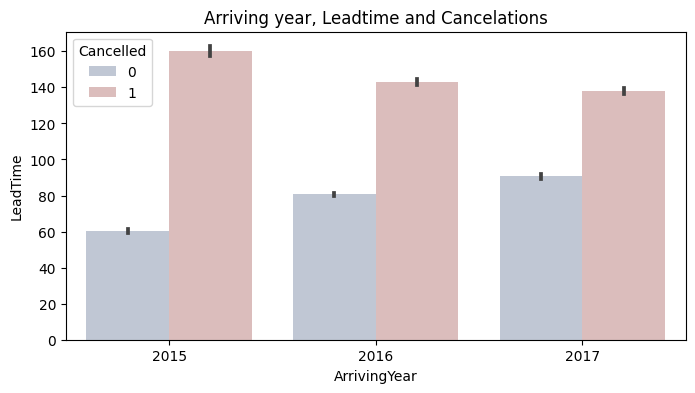

In [58]:
plt.figure(figsize=(8,4))
sns.barplot(x='ArrivingYear', y='LeadTime',hue='Cancelled', data= hotel, palette='vlag')
plt.title('Arriving year, Leadtime and Cancelations')

OBSERVATION:


Over the course of three years, it has been observed that bookings made with a lead time of fewer than 100 days are less likely to be canceled, whereas bookings with a lead time exceeding 100 days have a higher likelihood of being canceled.

CORRELATION HEAT MAP

<Axes: >

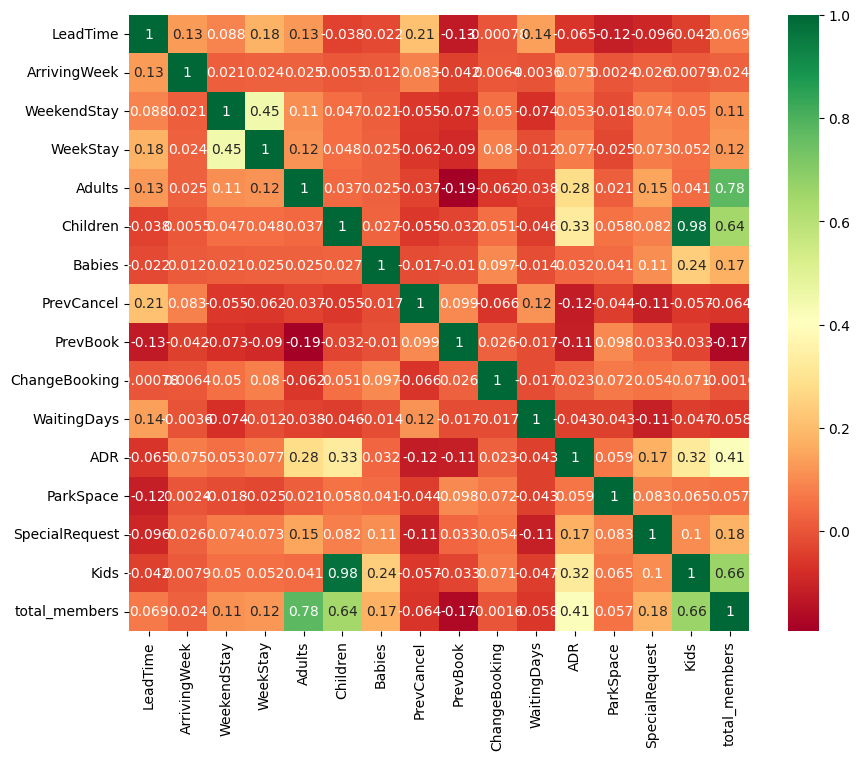

In [60]:
#Lets see the correlation
plt.figure(figsize=(10,8))
sns.heatmap(hotel.corr(),annot=True,cmap='RdYlGn')

HOTEL CANCELLATION PIE CHART

<Axes: ylabel='Cancelled'>

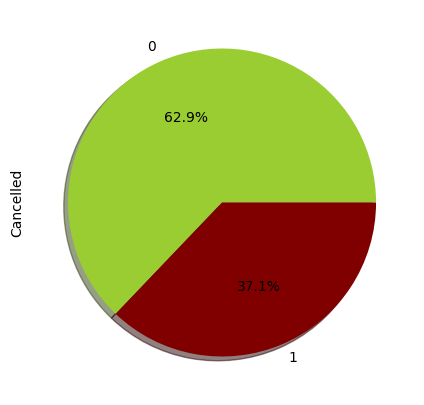

In [64]:
cols = ['yellowgreen', 'maroon']
hotel['Cancelled'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True, colors=cols)

OBSERVATIONS:

Based on the information provided by the pie chart, it can be seen that 63% of the bookings remained unaffected by cancellations, while 37% of the bookings experienced cancellations at the hotel.



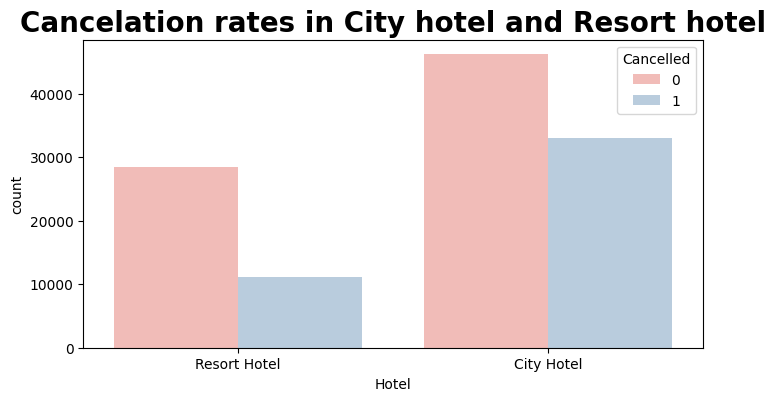

In [68]:
plt.figure(figsize=(8,4))

sns.countplot(x='Hotel',hue="Cancelled", data=hotel,palette='Pastel1')
plt.title("Cancelation rates in City hotel and Resort hotel",fontweight="bold", size=20)
plt.show()

OBSERVATION

The majority of bookings were made at the city hotel, and the rate of cancellations at the resort hotel is lower when compared to the city hotel.

ARRIVALS PER YEAR AND MONTH

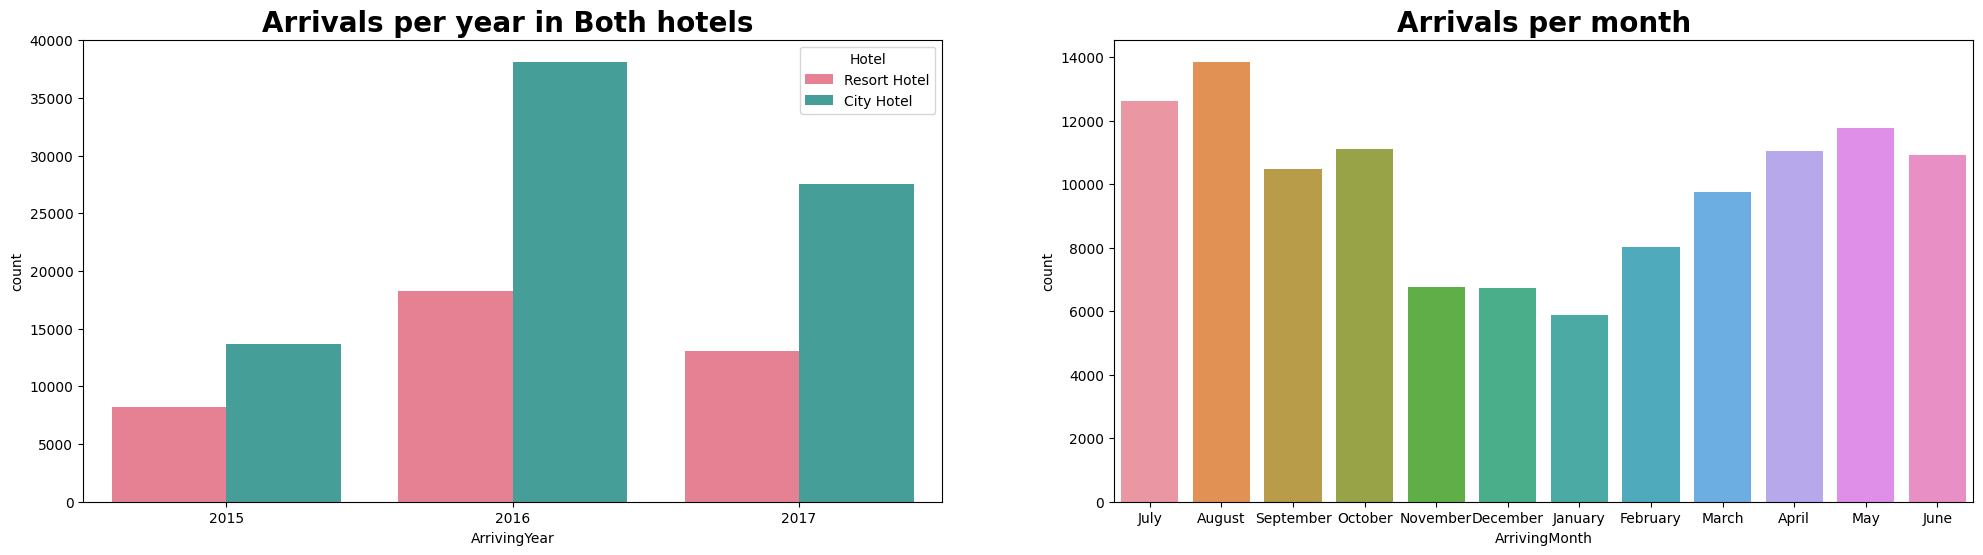

In [72]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='ArrivingYear',hue='Hotel', data=hotel,palette='husl')
plt.title("Arrivals per year in Both hotels ",fontweight="bold", size=20)
plt.subplot(1, 2, 2)
sns.countplot(data = hotel, x = 'ArrivingMonth')
plt.title('Arrivals per month',fontweight="bold", size=20)
plt.subplots_adjust(right=1.7)

plt.show()

ARRIVAL DATE

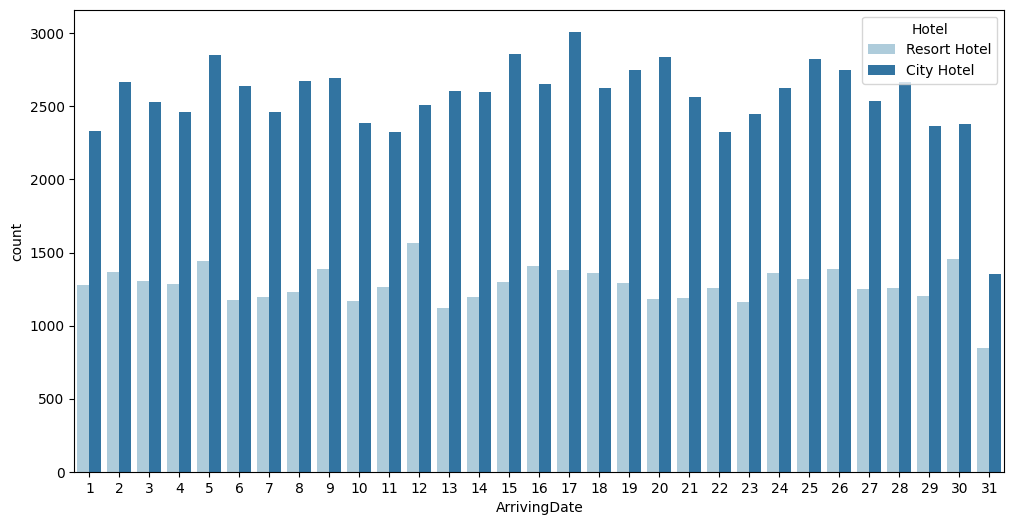

In [74]:
plt.figure(figsize=(12,6))

sns.countplot(data = hotel, x = 'ArrivingDate', hue='Hotel', palette='Paired')
plt.show()

OBSERVATIONS:

-Arrivals are notably lower on month-end days.


-The city hotel experiences a higher volume of bookings

WEEKEND STAY

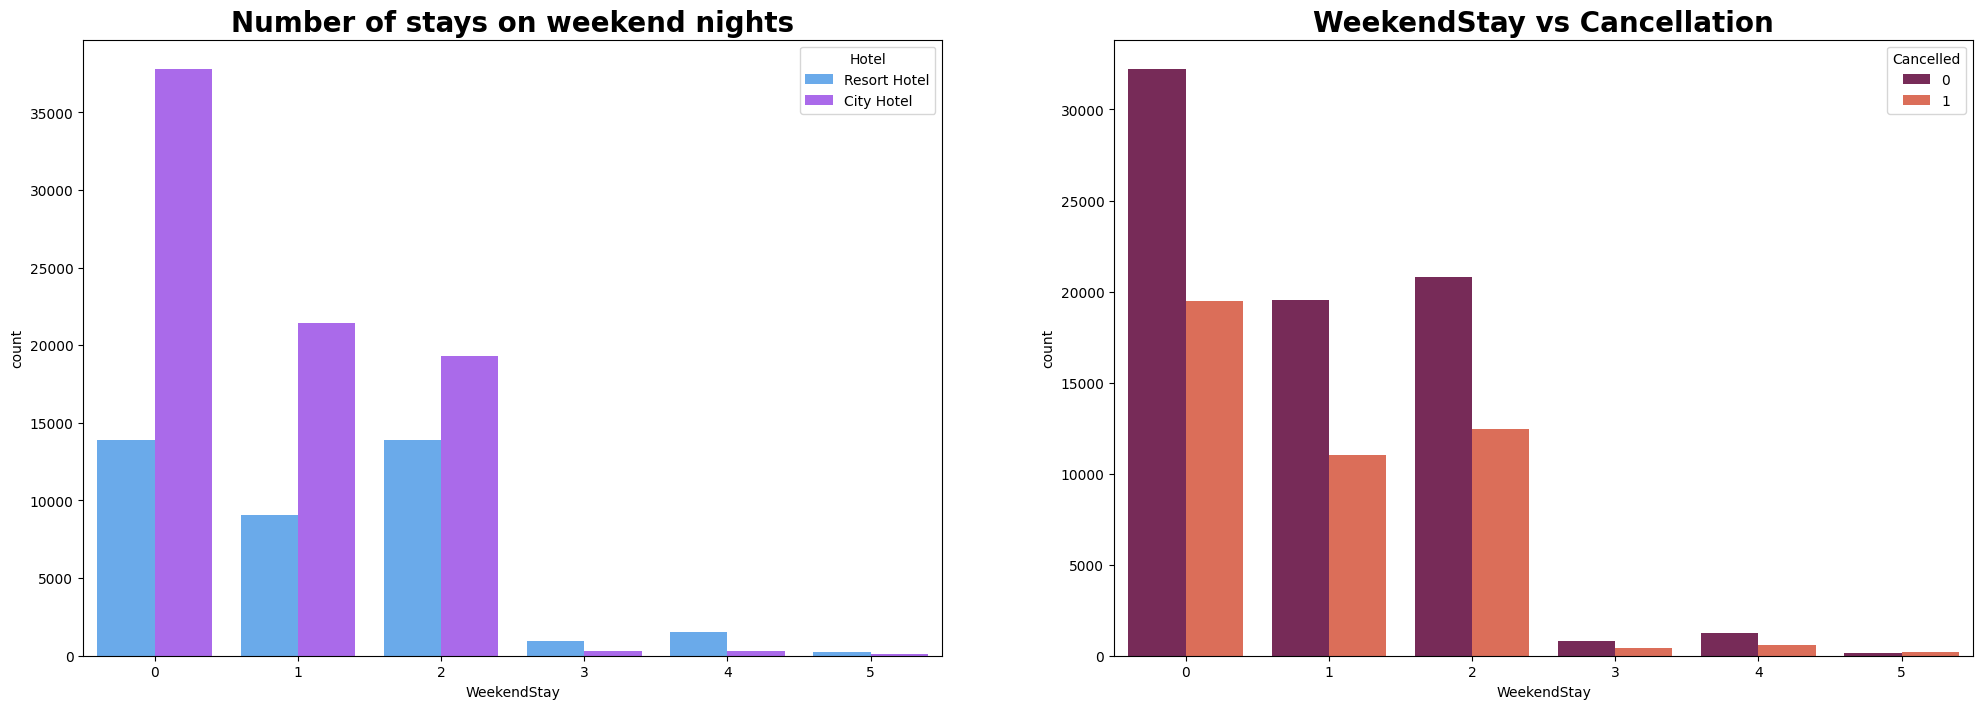

In [78]:
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
sns.countplot(x='WeekendStay',hue='Hotel', data=hotel, palette='cool')
plt.title("Number of stays on weekend nights",fontweight="bold", size=20)
plt.subplot(1, 2, 2)
sns.countplot(data = hotel, x = 'WeekendStay', hue='Cancelled', palette='rocket')
plt.title('WeekendStay vs Cancellation',fontweight="bold", size=20)
plt.subplots_adjust(right=1.7)

plt.show()

OBSERVATIONS:

 Weekday night stays were more in City Hotel

 Less cancelations were observed


ADULT BOOKING DATA

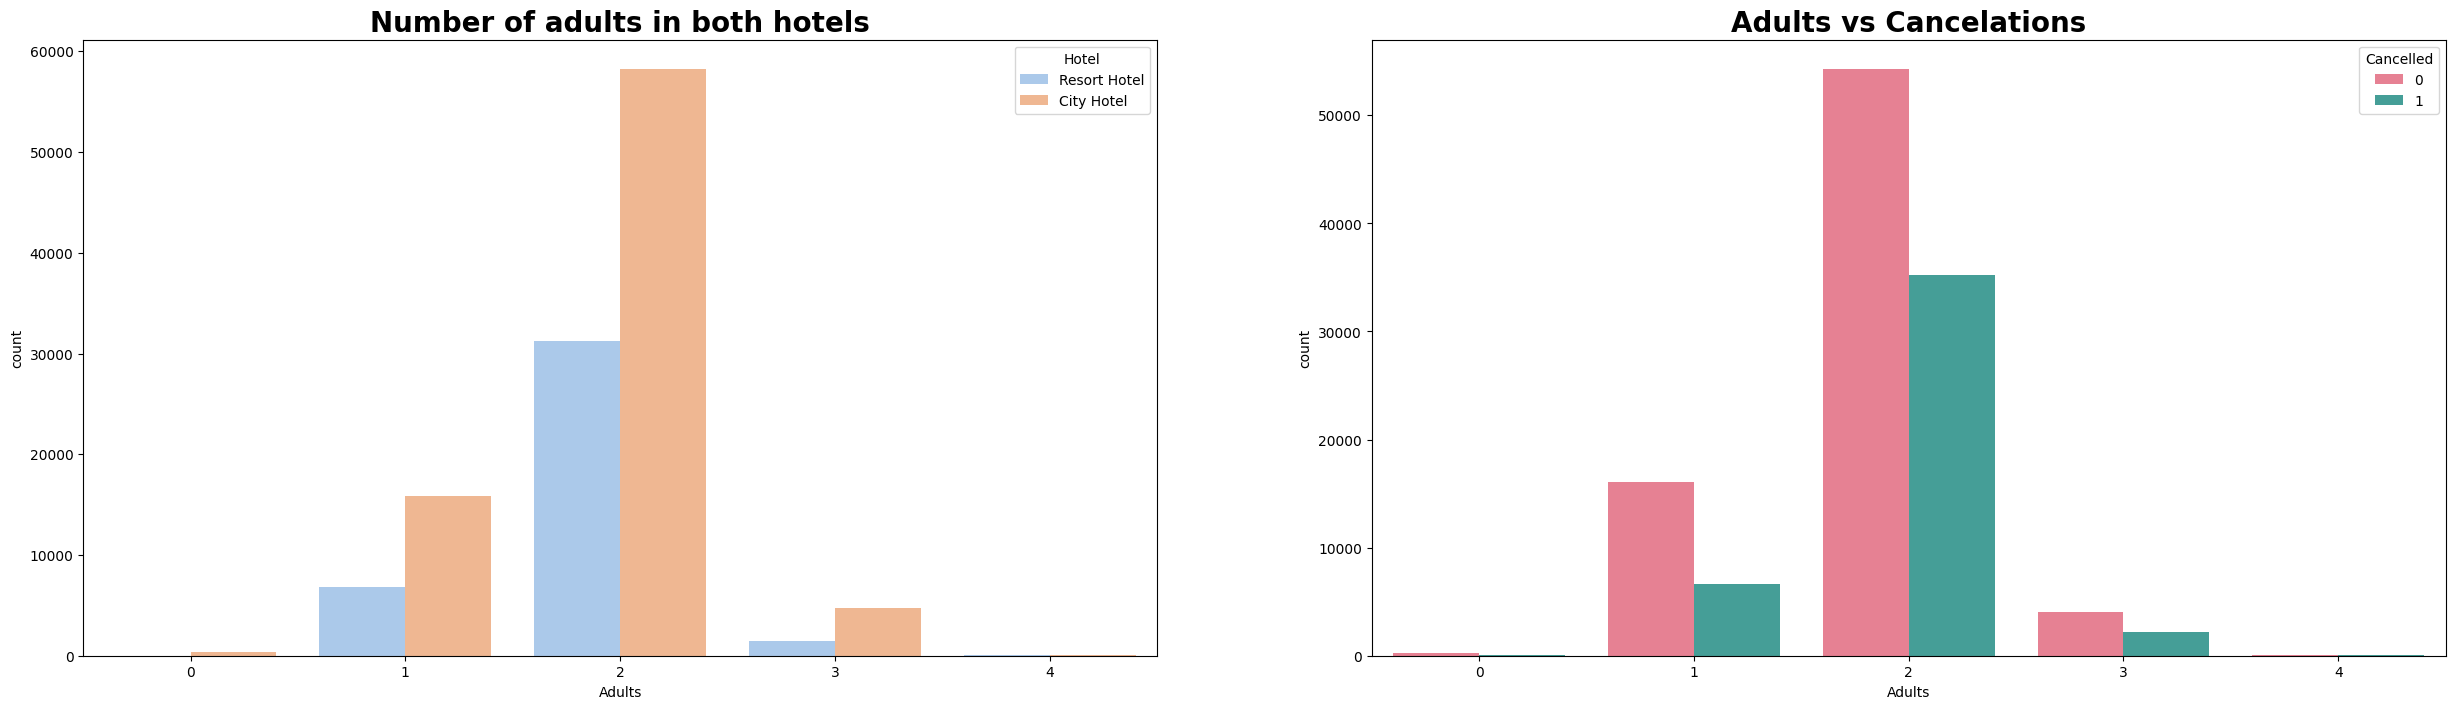

In [81]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.countplot(x='Adults',hue='Hotel', data=hotel, palette='pastel')
plt.title("Number of adults in both hotels",fontweight="bold", size=20)
plt.subplot(1, 2, 2)
sns.countplot(data = hotel, x = 'Adults', hue='Cancelled', palette='husl')
plt.title('Adults vs Cancelations',fontweight="bold", size=20)
plt.subplots_adjust(right=1.7)
plt.show()

OBSERVATION:

Adults who were 2 in number are more and preferred city hotel rather than resort hotel, infact more than half the visitors even canceled the bookings

FROM WHICH COUNTRY WERE THE HIGHEST NUMBER OF BOOKINGS?

In [82]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots
# Minmax scaler
from sklearn.preprocessing import MinMaxScaler

In [84]:
country_visitors = hotel[hotel['Cancelled'] == '0'].groupby(['Country']).size().reset_index(name = 'count')


import plotly.express as px

px.choropleth(country_visitors,
                    locations = "Country",
                    color= "count" ,
                    hover_name= "Country", # column to add to hover information
                    color_continuous_scale="Viridis",
                    title="Home country of visitors")

OBSERVATION:
A larger number of visitors originate from Western Europe, with France, the United Kingdom, and Portugal being the most prominent countries of origin.

WAS THERE A DEPOSIT TAKEN BEFORE BOOKING?

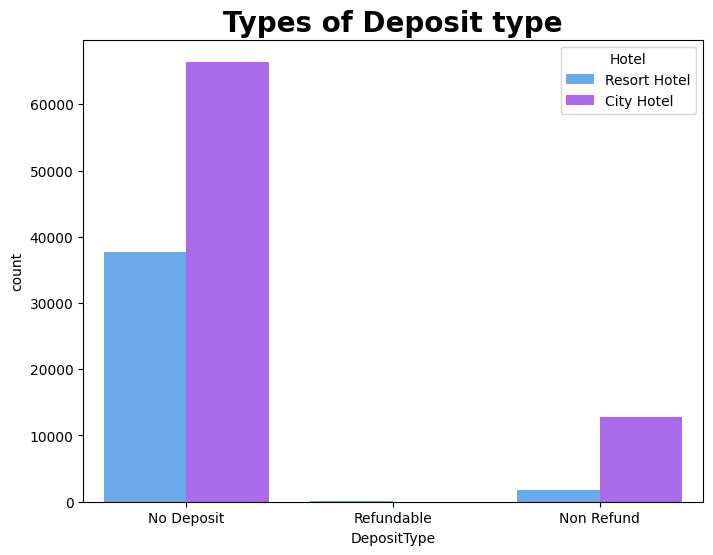

In [86]:
plt.figure(figsize=(8, 6))

sns.countplot(data = hotel, x = 'DepositType',hue='Hotel', palette='cool')
plt.title('Types of Deposit type',fontweight="bold", size=20)


plt.show()

OBSERVATION:



The City hotel did not require any deposits, whereas Resorts did have deposit requirements. The absence of a deposit could potentially result in booking cancellations.

AVERAGE DAILY RATE (ADR)

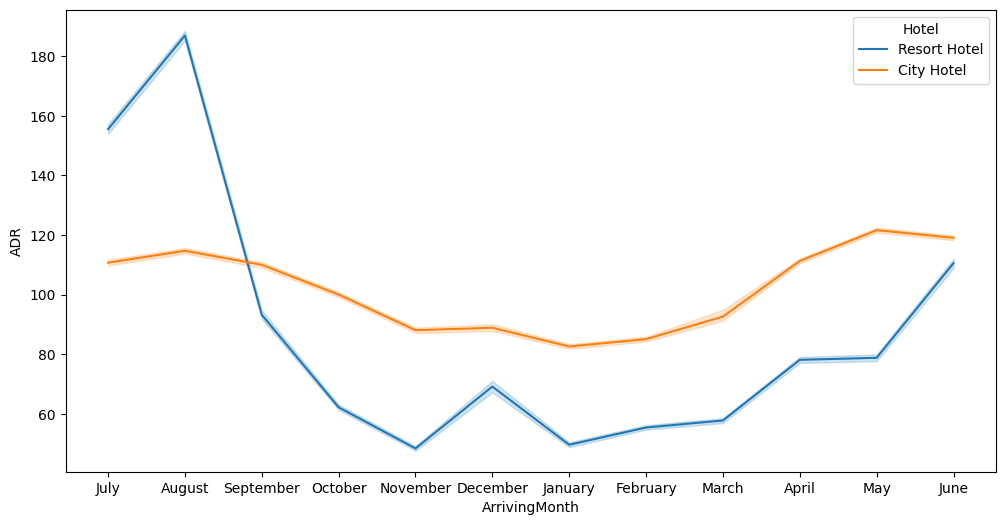

In [89]:
plt.figure(figsize=(12,6))
sns.lineplot(x='ArrivingMonth', y='ADR', hue='Hotel', data= hotel)
plt.show()

logistic

OBSERVATIONS:

For Resort Hotel, ADR is more expensive during July, August & September and for City Hotel, ADR is slightly more during March, April & May.

**SUMMARY**

1.**Target City Hotels**: The majority of our bookings are for city hotels. Therefore, it is essential to allocate a significant portion of our marketing budget to these establishments. This ensures that we maximize our reach and visibility in the city hotel segment, where the majority of our customers are booking.


2.**Address Cancellation Rates**: We have noticed a high rate of cancellations, which could potentially be linked to our no deposit policies. To mitigate this issue, we should consider adjusting our deposit requirements or implementing other strategies to reduce cancellations and secure more bookings.


3.**Focus on Peak Months (May to Aug)**: May to August is the peak period due to the summer season. During these months, people are more inclined to travel and make bookings. Therefore, it is advisable to concentrate our marketing efforts and promotional campaigns during this timeframe to capitalize on the increased demand.


4.**Target Western European Guests**: The data shows that a significant portion of our guests hail from Western Europe. To optimize our marketing budget, we should allocate a substantial portion of it to target this specific geographic region. This will allow us to effectively reach and attract more guests from Western Europe.


5.**Promote Guest Loyalty**: Since we do not have a substantial number of repeat guests, it's crucial to focus on strategies aimed at increasing guest loyalty. Implement loyalty programs, personalized marketing, and incentives to encourage guests to return for future bookings. This will help us build a loyal customer base and drive repeat business.

